In [1]:
import pandas as pd

In [2]:
transactions_df = pd.read_excel("Analyticke zadanie 2021.xlsx", sheet_name='transactions')

In [3]:
products_df = pd.read_excel("Analyticke zadanie 2021.xlsx", sheet_name='products')

In [4]:
#Dropping column "idcustomer", because it has a lot of empty cells
transactions_df.drop(['idcustomer'], axis=1, inplace=True)

In [5]:
products_df.drop(['atc'], axis=1, inplace=True)

In [6]:
#Here we see amount 16058 of presented products
products_df.nunique()

idproduct       16058
product_name    13879
product_form     4680
product_type        3
kategoria 0        22
kategoria 1        71
kategoria 2        52
kategoria 3        17
dtype: int64

In [7]:
#From 168603 transaction We have 2269 distinct id rpoducts,means that there is products which customers likes more
transactions_df.nunique()

dateorder       59
idbill       82725
idproduct     2269
qty             49
price         3530
dtype: int64

In [8]:
df_freq = pd.DataFrame({'count':transactions_df.groupby(['idproduct']).size()}).reset_index()

In [9]:
#Here we can see that the most purchased product id is 30365
df_freq.sort_values(by='count', ascending=False)

,idproduct,count
187,30365,6786
140,28533,3570
21,906,3203
125,25655,2304
249,36872,2061
...,...,...
2010,185677,1
2017,185808,1
105,16119,1
472,107761,1


In [10]:
#Making our frame smaller, count only products which had purchased more than 500 quantyties
filtered_df = df_freq.query('count>=1000')

In [11]:
filtered_df = filtered_df.set_index('idproduct')


In [12]:
filtered_df.index

Int64Index([   407,    906,   2971,   2972,  25655,  27082,  28533,  30365,
             32570,  34631,  36496,  36872,  51526,  53371,  75593, 114184,
            120205, 149133, 162402, 167750, 171346, 175376, 175878],
           dtype='int64', name='idproduct')

In [13]:
index_array = filtered_df.index
index_array

Int64Index([   407,    906,   2971,   2972,  25655,  27082,  28533,  30365,
             32570,  34631,  36496,  36872,  51526,  53371,  75593, 114184,
            120205, 149133, 162402, 167750, 171346, 175376, 175878],
           dtype='int64', name='idproduct')

In [14]:
#Searching fro best purchased products in table "products_df"
mask = products_df['idproduct'].isin(index_array)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
16053    False
16054    False
16055    False
16056    False
16057    False
Name: idproduct, Length: 16058, dtype: bool

In [17]:
#Creating new table 
purchased_df = products_df.loc[mask]
purchased_df

,idproduct,product_name,product_form,product_type,kategoria 0,kategoria 1,kategoria 2,kategoria 3
50,407,Dorsiflex,tbl 30x200mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
84,906,Acylpyrin,tbl 10x500mg,OTC,BOLESŤ A HORÚČKA OTC,Nepriradená,Nepriradená,Nepriradená
251,2971,Nasivin,"gtt nas 10ml 0,05%",OTC,Nepriradená,Nepriradená,Nepriradená,Nepriradená
252,2972,Nasivin,"aer nas 10ml 0,05% sklo",OTC,Nepriradená,Nepriradená,Nepriradená,Nepriradená
413,25655,Concor 5,tbl flm 30x5mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
452,27082,Furon,tbl 50x40mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
486,28533,Novalgin,tbl flm 20x500mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
659,30365,Muconasal plus,aer nao 10ml,OTC,NÁDCHA OTC,dospelí,spreje,Nepriradená
900,32570,Sinupret,gtt 100ml,OTC,Nepriradená,Nepriradená,Nepriradená,Nepriradená
1034,34631,Stilnox,tbl obd 20x10mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená


In [18]:
data = filtered_df
purchased_df.insert(2,'Purchasing_Count',data)

In [19]:
purchased_df

,idproduct,product_name,Purchasing_Count,product_form,product_type,kategoria 0,kategoria 1,kategoria 2,kategoria 3
50,407,Dorsiflex,1792,tbl 30x200mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
84,906,Acylpyrin,3203,tbl 10x500mg,OTC,BOLESŤ A HORÚČKA OTC,Nepriradená,Nepriradená,Nepriradená
251,2971,Nasivin,1065,"gtt nas 10ml 0,05%",OTC,Nepriradená,Nepriradená,Nepriradená,Nepriradená
252,2972,Nasivin,1120,"aer nas 10ml 0,05% sklo",OTC,Nepriradená,Nepriradená,Nepriradená,Nepriradená
413,25655,Concor 5,2304,tbl flm 30x5mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
452,27082,Furon,1726,tbl 50x40mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
486,28533,Novalgin,3570,tbl flm 20x500mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená
659,30365,Muconasal plus,6786,aer nao 10ml,OTC,NÁDCHA OTC,dospelí,spreje,Nepriradená
900,32570,Sinupret,1052,gtt 100ml,OTC,Nepriradená,Nepriradená,Nepriradená,Nepriradená
1034,34631,Stilnox,1597,tbl obd 20x10mg,RX,Nepriradená,Nepriradená,Nepriradená,Nepriradená


<AxesSubplot:>

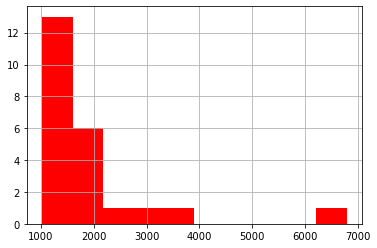

In [20]:
#At this histogram we see some unusuall customers behavior, there is product which they bought more than others
purchased_df['Purchasing_Count'].hist(color='red')

In [21]:
#there are our promo-product which brings unsuall behavior, now we can find time when promo had been provided
unusuall_purchased = purchased_df.query('Purchasing_Count>6000')

unusuall_purchased

,idproduct,product_name,Purchasing_Count,product_form,product_type,kategoria 0,kategoria 1,kategoria 2,kategoria 3
659,30365,Muconasal plus,6786,aer nao 10ml,OTC,NÁDCHA OTC,dospelí,spreje,Nepriradená


In [22]:
#As we see there are some negative valuese (maybe it has been rejection from product), it do not involved on our count of idproduts but will involve on price and quantity products
transactions_df[transactions_df['price']<0]

,dateorder,idbill,idproduct,qty,price
184420,2020-10-30,134611,189791,-8.0,-87.47
184421,2020-10-30,134613,163995,-1.0,-27.49
184422,2020-10-30,134674,163995,-1.0,-27.49
184423,2020-10-30,134709,14890,-1.0,-7.69
184424,2020-10-30,134709,30365,-1.0,-6.04
184425,2020-10-30,134709,161126,-1.0,-10.44
184426,2020-10-30,134709,186712,-1.0,-5.49
184427,2020-10-30,134713,192132,-1.0,-41.35


In [51]:
drop_neg = transactions_df[transactions_df['price']<0].index
transactions_df.drop(drop_neg, inplace=True)

In [52]:
mask_ = transactions_df['idproduct'].isin([30365])
mask_

0         False
1         False
2         False
3         False
4         False
          ...  
186598    False
186599     True
186600    False
186601    False
186602    False
Name: idproduct, Length: 186595, dtype: bool

In [53]:
promo_product = transactions_df.loc[mask_]
promo_product['qty'].sum()

7878.0

<AxesSubplot:xlabel='qty', ylabel='dateorder'>

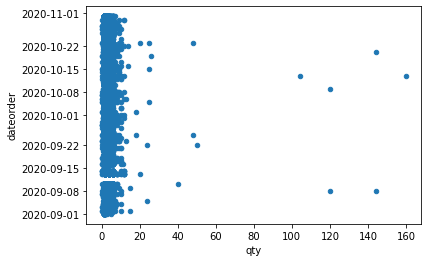

In [54]:
#Scatter plot shows that there are some leaders in quantity purchasing 
transactions_df.plot(x="qty", y="dateorder", kind="scatter")

In [55]:
#Lets see maybe we have some another leaders, by quantity of purchase
transactions_df[transactions_df['qty']>40]
qty_leaders = transactions_df.query('qty>40')

In [56]:
qty_leaders_arr=qty_leaders['idproduct'].unique()
qty_leaders_arr

array([151753, 151754, 179762, 190434, 136360])

In [57]:
mask_qty = df_freq['idproduct'].isin(qty_leaders_arr)
mask_qty

0       False
1       False
2       False
3       False
4       False
        ...  
2264    False
2265    False
2266    False
2267    False
2268    False
Name: idproduct, Length: 2269, dtype: bool

In [58]:
#here we see that it was single purchase
qty_leaders_count = df_freq.loc[mask_qty]
qty_leaders_count

,idproduct,count
808,136360,1
952,151753,4
953,151754,2
1762,179762,3
2154,190434,2


In [59]:
qty_m  =transactions_df['idproduct'].isin(qty_leaders_arr)
qty_m
qty_quntity_df = transactions_df.loc[qty_m]

In [60]:
#here we see that even 5 quantity leaders can't reach Promo-product which has been purchased 7878.0 times
#Means that it was large purchase for several persons and does not involve on common customer behavior
qty_quntity_df.sum()

/var/folders/_x/y7p2294s4t722sptmn184bvw0000gn/T/ipykernel_1413/2878124742.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  qty_quntity_df.sum()


idbill       1468899.00
idproduct    1967034.00
qty             1028.00
price            978.41
dtype: float64

In [72]:
group_promo = promo_product.groupby('dateorder')['qty'].sum()

In [73]:
group_trans = transactions_df.groupby('dateorder')['qty'].sum()

<AxesSubplot:xlabel='dateorder'>

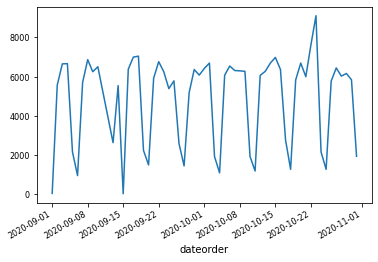

In [74]:
#Correlation between date and quantity of purchasing shows as untersing moment about date 10/22/2020
group_trans.plot(fontsize = 8)

<AxesSubplot:xlabel='dateorder'>

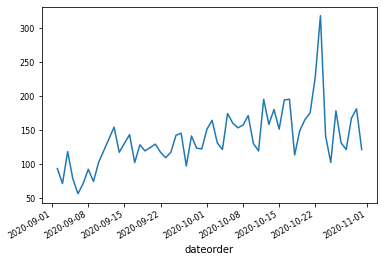

In [77]:
#If we take a look at plot wich represents Promo_product purchase to us, sipmly see sales peak at 10/22/2020
group_promo.plot(fontsize = 8)

In [78]:
#Investigation of dataset brings some crusial answers after vizualization at line [20] where has shown unsual amount of sales
#1. The best purchased product is 
unusuall_purchased

,idproduct,product_name,Purchasing_Count,product_form,product_type,kategoria 0,kategoria 1,kategoria 2,kategoria 3
659,30365,Muconasal plus,6786,aer nao 10ml,OTC,NÁDCHA OTC,dospelí,spreje,Nepriradená


In [79]:
#2. Quantity does not involves on leaders of sales. Important how often product appears in the bills
#That shows Scatter plot at line [54] and comparsion sales amount of Quantity-leaders and Promo-product 


In [80]:
#3. After investigation of transactions dates, has found that sales peak take a place at 10/22/2020
#It shows growth of sales till that date and decline after
#I suggest 10/22/2020 could be end of the promo action, because people buy products better if product is in the deficit

In [39]:
transactions_df.to_csv('Transactions.csv')

In [42]:
df_freq.to_csv('Products_frequency_in_bill.csv')

In [44]:
filtered_df.to_csv('Purchase_leaders.csv')

In [46]:
purchased_df.to_csv('Products_purchase_top.csv')

In [62]:
promo_product.to_csv('Transactions_promo_product.csv')

In [81]:
#Thank you 
#Kind regards